# HW 3
2014 - 19586 정현재

필요한 library들

In [6]:
import math
import time
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import solve_banded, norm

list 를 이용하는 방법에 필요한 함수들

In [7]:
def matelement(m,n):
    if m == n:
        return 2
    elif abs(m-n) == 1:
        return -1
    else: return 0

def matelement2(i, j, n):
    if i == j: return 4
    elif abs(i-j) == n-1: return -1
    elif abs(i-j) == 1 and (i+j)%(2*n-2) != 2*n - 3 : return -1
    else: return 0

def parse_mat(matA, matL, matD, matU, matLD):
    n = len(matA)
    for row in range(n):
        for col in range(n):
            if row == col:
                matD[row][col] = matA[row][col]
                matLD[row][col] = matA[row][col]
            if row > col:
                matL[row][col] = matA[row][col]
                matLD[row][col] = matA[row][col]
            if row < col:
                matU[row][col] = matA[row][col]
    return matL, matD, matU, matLD


def calcjacobi(matL,invD,matU, vec, h2fi, realsol,h):
    error = 0
    sol = vecminus(vecsum(vecsum(dot(matL,vec),dot(matU,vec)),h2fi))  ## -(L+U)u -h^2f

    sol = dot(invD,sol)

    for i in range(len(sol)):
        error += (sol[i]-realsol[i])**2
    error = h*error

    return sol, error

def calcjacobi2(matL, invD, matU, vec, rhs, hx, hy):
    error = 0
    previoussol = vec.copy()
    sol = vecsum(vecminus(vecsum(dot(matL,vec),dot(matU,vec))), rhs)  ## -(L+U)u -h^2

    sol = dot(invD,sol)

    for i in range(len(sol)):
        error += (sol[i]-previoussol[i])**2
    error = hx*hy*error

    return sol, error

def calcGS(invLD, matU, vec, h2fi, realsol,h):
    error = 0
    sol = vecminus(vecsum(dot(matU,vec),h2fi))

    sol = dot(invLD,sol)

    for i in range(len(sol)):
        error += (sol[i]-realsol[i])**2
    error = h*error

    return sol, error

def calcGS2(invLD, matU, vec, rhs,hx, hy):
    error = 0
    previoussol = vec.copy()
    sol = vecsum(vecminus(dot(matU,vec)),rhs)

    sol = dot(invLD,sol)

    for i in range(len(sol)):
        error += (sol[i]-previoussol[i])**2
    error = hx*hy*error

    return sol, error

def dot(A,v):
    result = []
    for i in range(len(A)):
        sum = 0
        for j in range(len(A[i])):
            sum += A[i][j]*v[j]
        result.append(sum)
    return(result)

def vecsum(v1, v2):
    if len(v1) == len(v2):
        result = [v1[i]+v2[i] for i in range(len(v1))]
    else: return("wrong vector")
    return result
        
def vecminus(v):
    return([-i for i in v])

def invtrimat(matX):
    n = len(matX)
    invX = [[0 for col in range(n)] for row in range(n)]
    for i in range(n):
        invX[i][i] = 1/matX[i][i]
    
    for row in range(n):
        for col in reversed(range(row)):
            invX[row][col] = - sum([invX[row][i]*matX[i][col] for i in range(n)])/matX[col][col]
    
    return(invX)

    



In [8]:
# 1. u_xx = sinx

(1) python library를 이용

In [9]:
def problem_1_1(n):
    x0 = 0
    xn = math.pi
    h = (xn-x0) / n
    X = [x0 + h*i for i in range(1,n)]

    f = lambda x: -math.sin(x)
    
    h2fi = [h**2*f(i) for i in X]
    realsol = [math.sin(i) for i in X]

    matA = [[0 for col in range(n-1)] for row in range(n-1)]
    matL = [[0 for col in range(n-1)] for row in range(n-1)]
    matD = [[0 for col in range(n-1)] for row in range(n-1)]
    matU = [[0 for col in range(n-1)] for row in range(n-1)]
    matLD = [[0 for col in range(n-1)] for row in range(n-1)]

    jacobsol = [0 for i in range(n-1)]
    GSsol = [0 for i in range(n-1)]
    
    for row in range(n-1):
        for col in range(n-1):
            matA[row][col] = matelement(row,col)
    
    matL, matD, matU, matLD = parse_mat(matA, matL, matD, matU, matLD)
    
    del matA

    #Jacobi Method
    count1 = 0
    error1 = 1
    
    invD = [[0 for col in range(len(matD))] for row in range(len(matD))]
    for i in range(len(matD)):
        invD[i][i] = 1/matD[i][i]
    del matD

    while count1 < 100000 and error1 > 0.0001:
        count1 += 1
        jacobsol, error1 = calcjacobi(matL, invD, matU, jacobsol, h2fi, realsol,h)
    jacobsol = [0] + jacobsol +[0]
    
    #Gauss-Siedel Method
    count2 = 0
    error2 = 1
    
    invLD = invtrimat(matLD)
    del matLD

    while count2 < 100000 and error2 > 0.0001:
        count2 += 1
        GSsol, error2 = calcGS(invLD, matU, GSsol, h2fi, realsol,h)
    GSsol = [0] + GSsol + [0]
    
    print("Jacobi method에서 {0}의 반복을 통해 {1}의 error를 가진 해를 얻었다.".format(count1, error1))
    print("Gauss-Siedel Method에서 {0}의 반복을 통해 {1}의 error를 가진 해를 얻었다.".format(count2,error2))
    
    
    realsol = [0] + realsol +[0]
    return jacobsol, GSsol, realsol


(2) numpy library 이용

In [10]:
def problem_1_2(n):
    
    x0 = 0
    xn = math.pi

    h = (xn - x0) / n
    f = lambda x: -math.sin(x)

    X = np.linspace(x0, xn, num = n+1)[1:-1]
    fi = np.vectorize(f)(X)
    realsol = np.sin(X)
    matA = np.zeros((n-1,n-1))
    ##np.vectorize
    jacobsol = np.zeros(n-1)
    GSsol = np.zeros(n-1)

    matA[np.eye(n-1)==1] = 2
    matA[np.eye(n-1,k=1)==1] = -1
    matA[np.eye(n-1,k=-1)==1] = -1
    

    #Jacobian Method
    count1 = 0
    error1 = 1
    matLU = matA.copy()
    matLU[np.eye(n-1)==1] = 0
    invD = (1/2)*np.eye(n-1)

    while count1 < 100000 and error1 > 0.0001:
        count1 += 1
        jacobsol = np.dot(-matLU,jacobsol) - h**2*fi
        jacobsol = invD.dot(jacobsol)
        error1 = np.sum((jacobsol - realsol)**2*h)

    #Gauss-Siedel Method
    count2 = 0
    error2 = 1
    matU = np.triu(matA,k=1)
    
    invLD = np.linalg.inv(np.tril(matA))
    while count2 < 100000 and error2 > 0.0001:
        count2 += 1
        GSsol = np.dot(-matU,GSsol) - h**2*fi
        GSsol = invLD.dot(GSsol)
        error2 = np.sum((GSsol - realsol)**2*h)

    print("Jacobi method에서 {0}의 반복을 통해 {1}의 error를 가진 해를 얻었다.".format(count1, error1))
    print("Gauss-Siedel Method에서 {0}의 반복을 통해 {1}의 error를 가진 해를 얻었다.".format(count2,error2))
    
    jacobsol = np.concatenate(([0],jacobsol,[0]))
    GSsol = np.concatenate(([0],GSsol,[0]))
    realsol = np.concatenate(([0],realsol,[0]))

    return jacobsol, GSsol, realsol


(3) 기타 라이브러리를 이용하는 방법(scipy)

In [11]:
def problem_1_3(n):
    
    x0 = 0
    xn = math.pi

    h = (xn-x0)/n
    f = lambda x: -math.sin(x)

    X = np.linspace(x0, xn, num = n+1)
    fi = np.vectorize(f)(X[1:-1])
    realsol = np.sin(X)

    ab = np.array([[0]+[-1]*(n-2),[2]*(n-1),[-1]*(n-2)+[0]])
    sol = solve_banded((1,1),ab,-h**2*fi)
    sol = np.concatenate(([0],sol,[0]))
    error = np.sum((sol-realsol)**2*h)
    
    fig, axes = plt.subplots(1,2)
    fig.suptitle('Problem 1-3')
    axes[0].plot(X,sol)
    axes[0].set_title('Solution')
    axes[1].plot(X,realsol)
    axes[1].set_title('Real solution')
    plt.show()

    print('구한 근사치와 실제 해의 차이(error)는 {}입니다.'.format(error))


(4) Plot

In [12]:
def problem_1_4(n):

    x0 = 0
    xn = math.pi

    X = np.linspace(x0,xn, num = n+1)

    jacobsol, GSsol, realsol = problem_1_2(n)
    fig, axes = plt.subplots(1,3)

    fig.suptitle('Problem 1-2')
    axes[0].plot(X, jacobsol)
    axes[0].set_title('Jacobi method')
    axes[1].plot(X, GSsol)
    axes[1].set_title('G-S method')
    axes[2].plot(X,realsol)
    axes[2].set_title('Real solution')
    plt.show()


# 2. u_xx + u_yy = -2sinx*cosy

(1) python list를 이용하는 방법

In [13]:
def problem_2_1(n):
        
    x0 = 0
    xn = math.pi
    y0 = 0
    yn = math.pi

    hx = (xn - x0) / n
    hy = (yn - y0) / n
    f = lambda x,y: -2*math.sin(x)*math.cos(y)

    h2fi = [-hx*hy*f(x0+x*hx,y0+y*hy) for x in range(1,n) for y in range(1,n)]
    
    matA = [[0 for col in range((n-1)**2)] for row in range((n-1)**2)]
    matL = [[0 for col in range((n-1)**2)] for row in range((n-1)**2)]
    matD = [[0 for col in range((n-1)**2)] for row in range((n-1)**2)]
    matU = [[0 for col in range((n-1)**2)] for row in range((n-1)**2)]
    matLD = [[0 for col in range((n-1)**2)] for row in range((n-1)**2)]
    jacobsol = [0 for i in range((n-1)**2)]
    GSsol = [0 for i in range((n-1)**2)]

    for row in range((n-1)**2): ## Make matrice A
        for col in range((n-1)**2):
            matA[row][col] = matelement2(row,col,n)
    
    matL, matD, matU, matLD = parse_mat(matA, matL, matD, matU, matLD)
    del matA

    '''
    bound = []
    for i in range(n-1):
        bound += [math.sin(hx*i)*math.cos(y0)]
        bound += [0]*(n-3)
        bound += [math.sin(hx*i)*math.cos(yn)]
    '''

    rhs = h2fi

    #Jacobian Method
    count1 = 0
    error1 = 1
    
    invD = [[0 for col in range(len(matD))] for row in range(len(matD))]
    for i in range(len(matD)):
        invD[i][i] = 1/matD[i][i]
    del matD

    while count1 < 1000 and error1 > 0.000001:
        count1 += 1
        jacobsol, error1 = calcjacobi2(matL, invD, matU, jacobsol, rhs, hx, hy)

    
    #Gauss-Siedel Method
    count2 = 0
    error2 = 1
    
    invLD = invtrimat(matLD)
    del matLD
    
    while count2 < 1000 and error2 > 0.000001:
        count2 += 1
        GSsol, error2 = calcGS2(invLD, matU, GSsol, rhs,hx, hy)
        
    ##Plot하기 위해서 Numpy 라이브러리 사용
    jacobsol = np.array(jacobsol)
    GSsol = np.array(GSsol)

    jacobsol = jacobsol.reshape((n-1,n-1))
    GSsol = GSsol.reshape((n-1,n-1))


    print("Jacobi method에서 {0}의 반복을 통해 {1}이하의 변화를 가진 해를 얻었다.".format(count1, error1))
    print("Gauss-Siedel Method에서 {0}의 반복을 통해 {1}이하의 변화를 가진 해를 얻었다.".format(count2,error2))
    return jacobsol, GSsol


(2) Numpy library를 이용하는 방법

In [14]:
def problem_2_2(n):
    h = math.pi / (n)
    
    x0 = 0
    xn = math.pi
    
    y0 = 0
    yn = math.pi

    f = lambda x,y: -2*math.sin(x)*math.cos(y)

    X = np.linspace(x0,xn, n+1)[1:-1]
    Y = np.linspace(y0,yn, n+1)[1:-1]
    YY,XX = np.meshgrid(Y,X)
    fi = np.vectorize(f)(XX,YY)
    fi = fi.reshape(-1)

    sol = np.zeros((n+1,n+1))
    matA = np.zeros(((n-1)**2,(n-1)**2))

    jacobsol = np.zeros((n-1)**2)
    GSsol = np.zeros((n-1)**2)

    matA[np.eye((n-1)**2)==1] = 4
    matA[np.eye((n-1)**2,k=1)==1] = -1
    matA[np.eye((n-1)**2,k=-1)==1] = -1
    matA[np.eye((n-1)**2,k=-n+1)==1] = -1
    matA[np.eye((n-1)**2,k=n-1)==1] = -1


    for i in range(1,n-1):
        matA[i*(n-1)-1,i*(n-1)] = 0
        matA[i*(n-1),i*(n-1)-1] = 0
    '''
    bound = np.hstack((np.array([math.sin(x)*math.cos(y0) for x in X]).reshape((-1,1)),np.zeros((n-1,n-3))))
    bound = np.hstack((bound, np.array([math.sin(x)*math.cos(yn) for x in X]).reshape((-1,1))))
    bound = bound.reshape((n-1)**2)
    '''
    rhs = -h**2*fi

    #Jacobi Method
    count1 = 0
    error1 = 1
    matLU = matA.copy()
    matLU[np.eye((n-1)**2)==1] = 0


    while count1 < 10000 and error1 > 0.000001:
        count1 += 1
        previoussol = jacobsol.copy()
        jacobsol = np.dot(-matLU,jacobsol) + rhs
        jacobsol = jacobsol/4

        error1 = np.sum(h**2*(jacobsol - previoussol)**2)
        
    #Gauss-Siedel Method
    count2 = 0
    error2 = 1
    matU = np.triu(matA,k=1)
    
    invLD = np.linalg.inv(np.tril(matA))
    
    while count2 < 10000 and error2 > 0.000001:
        count2 += 1
        previoussol = GSsol.copy()
        GSsol = np.dot(-matU,GSsol) + rhs
        GSsol = invLD.dot(GSsol)
        error2 = np.sum((GSsol - previoussol)**2*h**2)

    jacobsol = jacobsol.reshape(n-1,n-1)
    
    GSsol = GSsol.reshape(n-1,n-1)
    
    
    del sol

    print("Jacobi method에서 {0}의 반복을 통해 {1}이하의 변화를 가진 해를 얻었다.".format(count1, error1))
    print("Gauss-Siedel Method에서 {0}의 반복을 통해 {1}이하의 변화를 가진 해를 얻었다.".format(count2,error2))

    

    return jacobsol, GSsol


(3) 기타 라이브러리를 이용하는 방법(scipy)

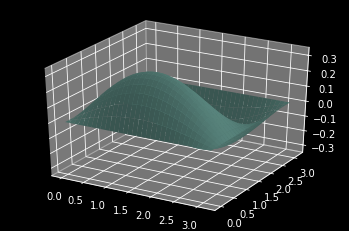

Scipy로 계산한 결과 그림과 같은 해를 얻었다.


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00250914,  0.00478815, ..., -0.00478815,
        -0.00250914,  0.        ],
       [ 0.        ,  0.00501224,  0.00956477, ..., -0.00956477,
        -0.00501224,  0.        ],
       ...,
       [ 0.        ,  0.00501224,  0.00956477, ..., -0.00956477,
        -0.00501224,  0.        ],
       [ 0.        ,  0.00250914,  0.00478815, ..., -0.00478815,
        -0.00250914,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [23]:
def problem_2_3(n):
    h = math.pi / (n)
    x0 = 0
    xn = math.pi
    y0 = 0
    yn = math.pi

    X = np.linspace(x0,xn, num=n+1)[1:-1]
    Y = np.linspace(y0,yn, num=n+1)[1:-1]

    YY, XX = np.meshgrid(Y,X)
    f = lambda x,y: -2*math.sin(x)*math.cos(y)
    fi = np.vectorize(f)(XX,YY)
    fi = fi.reshape(-1)

    '''
    bound = np.hstack((np.array([math.sin(x)*math.cos(y0) for x in X]).reshape((-1,1)),np.zeros((n-1,n-3))))
    bound = np.hstack((bound, np.array([math.sin(x)*math.cos(yn) for x in X]).reshape((-1,1))))
    bound = bound.reshape((n-1)**2)
    '''

    ab = []
    ab.append([0 for i in range(n-1)]+ [-1 for i in range((n-1)**2-n+1)])
    for i in range(n-3):
        ab.append([0 for i in range((n-1)**2)])
    ab.append(([0]+[-1 for i in range(n-2)])*(n-1))
    ab.append([4 for i in range((n-1)**2)])
    ab.append(([-1 for i in range(n-2)]+[0])*(n-1))
    for i in range(n-3):
        ab.append([0 for i in range((n-1)**2)])
    ab.append([-1 for i in range((n-1)**2-n+1)]+[0 for i in range(n-1)])
    ab = np.array(ab)

    sol = solve_banded((n-1,n-1),ab,-h**2*fi)

    sol = sol.reshape((n-1,n-1))
    template =np.zeros((n+1,n+1))
    template[1:-1,1:-1] = sol
    sol = template.copy()
    del template

    X = np.linspace(x0,xn, num=n+1)
    Y = np.linspace(y0,yn, num=n+1)

    YY, XX = np.meshgrid(Y,X)

    ax = plt.subplot(1,1,1,projection = '3d')
    ax.plot_surface(XX,YY,sol)
    
    
    plt.show()

    print('Scipy로 계산한 결과 그림과 같은 해를 얻었다.')
    
    return sol
problem_2_3(64)

(4) Plot

Jacobi method에서 1의 반복을 통해 3.469533403501198e-06의 error를 가진 해를 얻었다.
Gauss-Siedel Method에서 1의 반복을 통해 1.3439906727091245e-05의 error를 가진 해를 얻었다.


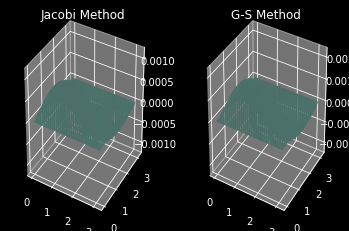

In [22]:
def problem_2_4(n):
    jacobsol, GSsol = problem_2_2(n)   ##problem_2_1과 problem_2_2 모두 적용 가능
    
    x0 = 0
    xn = math.pi
    y0 = 0
    yn = math.pi

    X = np.linspace(x0, xn, num = n+1)
    Y = np.linspace(y0, yn, num = n+1)

    sol = np.zeros((n+1,n+1))
    sol[1:-1,1:-1] = jacobsol
    jacobsol = sol.copy()
    sol[1:-1,1:-1] = GSsol
    GSsol = sol.copy()

    del sol

    YY, XX = np.meshgrid(Y,X)

    ax = plt.subplot(1,2,1,projection = '3d')
    ax.set_title('Jacobi Method')
    ax2 = plt.subplot(1,2,2,projection = '3d')
    ax2.set_title('G-S Method')

    ax.plot_surface(XX,YY,jacobsol)
    ax2.plot_surface(XX,YY,GSsol)

    plt.show()


    return
problem_2_4(64)


# 3. Savitzky-Golay smoothing filter

In [18]:
def problem_3(n,m):
    ## n : number of points
    ## m : degree of equation
    rawdata = open('sg_data.TXT','r')
    data_list = rawdata.readlines()
    for i in range(len(data_list)):
        data_list[i] = eval(data_list[i][:-1])
    data = np.array(data_list)
    filtered = []
    
    matA = np.zeros((n,m+1))
    for i in range(n):
        matA[i] = [(i-(n//2))**(m-j) for j in range(m+1)]
    
    invAAT = np.linalg.inv(matA.T.dot(matA))

    coeff = np.array(m+1)


    for i in range(len(data_list)-n+1):

        coeff = invAAT.dot((matA.T.dot(data[i:i+n])))
        
        filtered.append(coeff[m])

    filtered = [0]*(n//2) + filtered
    result = np.array(filtered)

    plt.plot(data,c = 'r')
    plt.plot(result, c = 'g')
    plt.show()

    return
